In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import time
import matplotlib.pyplot as plt


In [12]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/ML Assignment/Housing.csv'
df = pd.read_csv(file_path)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/100: Train Loss = 0.6769, Validation Loss = 0.6572
Epoch 2/100: Train Loss = 0.3694, Validation Loss = 0.4717
Epoch 3/100: Train Loss = 0.3182, Validation Loss = 0.4343
Epoch 4/100: Train Loss = 0.2894, Validation Loss = 0.4136
Epoch 5/100: Train Loss = 0.2726, Validation Loss = 0.4038
Epoch 6/100: Train Loss = 0.2677, Validation Loss = 0.3919
Epoch 7/100: Train Loss = 0.2621, Validation Loss = 0.3962
Epoch 8/100: Train Loss = 0.2577, Validation Loss = 0.3948
Epoch 9/100: Train Loss = 0.2553, Validation Loss = 0.3988
Epoch 10/100: Train Loss = 0.2513, Validation Loss = 0.3951
Epoch 11/100: Train Loss = 0.2485, Validation Loss = 0.3935
Epoch 12/100: Train Loss = 0.2505, Validation Loss = 0.4018
Epoch 13/100: Train Loss = 0.2506, Validation Loss = 0.4010
Epoch 14/100: Train Loss = 0.2415, Validation Loss = 0.4060
Epoch 15/100: Train Loss = 0.2388, Validation Loss = 0.4049
Epoch 16/100: Train Loss = 0.2333, Validation Loss = 0.4110
Epoch 17/100: Train Loss = 0.2360, Validation Los

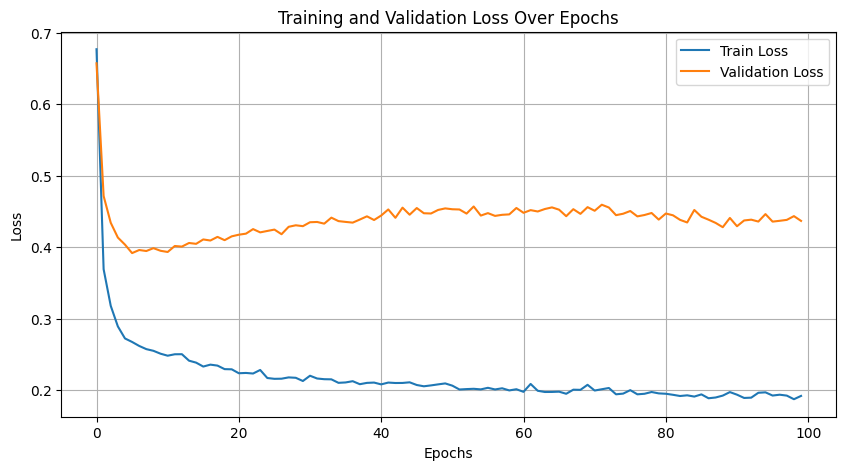

R² Score on the validation set: 0.6145


In [13]:
df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables to dummy variables

# Define features and target
X = df.drop('price', axis=1).values
y = df['price'].values

# Scaling features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Convert arrays to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32).view(-1, 1)

# Create dataset and split into training and validation
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader for training and validation sets
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Neural network with one hidden layer
class SimpleNeuralNetwork(nn.Module):
    def __init__(self):
        super(SimpleNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(X.shape[1], 8)
        self.relu = nn.ReLU()
        self.output_layer = nn.Linear(8, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.output_layer(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Function to train the model and print losses
def train_model(epochs):
    start_time = time.time()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_dataset)
        val_losses.append(val_loss)

        print(f'Epoch {epoch + 1}/{epochs}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds')
    return train_losses, val_losses, training_time

# Execute training
epochs = 100
train_losses, val_losses, training_time = train_model(epochs)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R² score for the validation set
model.eval()
predictions, targets = [], []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        output = model(X_batch)
        predictions.extend(output.view(-1).numpy())
        targets.extend(y_batch.view(-1).numpy())

predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
targets = scaler_y.inverse_transform(np.array(targets).reshape(-1, 1)).flatten()
r2 = r2_score(targets, predictions)
print(f'R² Score on the validation set: {r2:.4f}')

In [14]:
print(f"Final Extended Model Training Loss: {train_losses[-1]:.4f}")
print(f"Final Extended Model Validation Loss: {val_losses[-1]:.4f}")


Final Extended Model Training Loss: 0.1923
Final Extended Model Validation Loss: 0.4369


1B


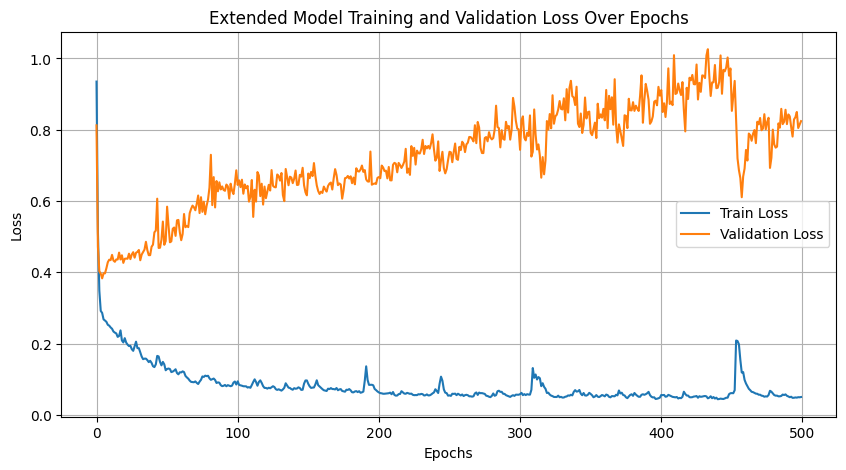

Total Training Time for Extended Model: 20.06 seconds
Final Extended Model Training Loss: 0.0504
Final Extended Model Validation Loss: 0.8242
R² Score on the validation set: 0.2381


In [16]:
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('price', axis=1).values
y = df['price'].values

# Scaling features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32).view(-1, 1)

# Create dataset and split into training and validation
dataset = TensorDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoader for training and validation sets
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the extended neural network model with additional hidden layers
class ExtendedNeuralNetwork(nn.Module):
    def __init__(self):
        super(ExtendedNeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(X.shape[1], 8)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(8, 16)  # Additional hidden layer
        self.layer3 = nn.Linear(16, 16)  # Additional hidden layer
        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.output_layer(x)
        return x

# Initialize the extended model, loss function, and optimizer
model = ExtendedNeuralNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Function to train the model and print losses
def train_model(epochs):
    start_time = time.time()
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_dataset)
        val_losses.append(val_loss)

    end_time = time.time()
    training_time = end_time - start_time
    return train_losses, val_losses, training_time

# Execute training
epochs = 500
train_losses, val_losses, training_time = train_model(epochs)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Extended Model Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Calculate R² score for the validation set
model.eval()
predictions, targets = [], []
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        output = model(X_batch)
        predictions.extend(output.view(-1).numpy())
        targets.extend(y_batch.view(-1).numpy())

predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1)).flatten()
targets = scaler_y.inverse_transform(np.array(targets).reshape(-1, 1)).flatten()
r2 = r2_score(targets, predictions)

# Print the training time and final results
print(f"Total Training Time for Extended Model: {training_time:.2f} seconds")
print(f"Final Extended Model Training Loss: {train_losses[-1]:.4f}")
print(f"Final Extended Model Validation Loss: {val_losses[-1]:.4f}")
print(f"R² Score on the validation set: {r2:.4f}")

2A

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/ML Assignment/cancer.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Epoch 1/100, Train Loss: 0.7387, Validation Loss: 0.6836, Acc: 59.65%
Epoch 2/100, Train Loss: 0.6523, Validation Loss: 0.6051, Acc: 78.07%
Epoch 3/100, Train Loss: 0.5816, Validation Loss: 0.5350, Acc: 87.72%
Epoch 4/100, Train Loss: 0.5186, Validation Loss: 0.4715, Acc: 89.47%
Epoch 5/100, Train Loss: 0.4607, Validation Loss: 0.4155, Acc: 92.98%
Epoch 6/100, Train Loss: 0.4088, Validation Loss: 0.3660, Acc: 94.74%
Epoch 7/100, Train Loss: 0.3633, Validation Loss: 0.3225, Acc: 96.49%
Epoch 8/100, Train Loss: 0.3235, Validation Loss: 0.2848, Acc: 96.49%
Epoch 9/100, Train Loss: 0.2890, Validation Loss: 0.2530, Acc: 97.37%
Epoch 10/100, Train Loss: 0.2595, Validation Loss: 0.2261, Acc: 97.37%
Epoch 11/100, Train Loss: 0.2352, Validation Loss: 0.2038, Acc: 97.37%
Epoch 12/100, Train Loss: 0.2147, Validation Loss: 0.1850, Acc: 97.37%
Epoch 13/100, Train Loss: 0.1977, Validation Loss: 0.1696, Acc: 97.37%
Epoch 14/100, Train Loss: 0.1830, Validation Loss: 0.1569, Acc: 97.37%
Epoch 15/100, T

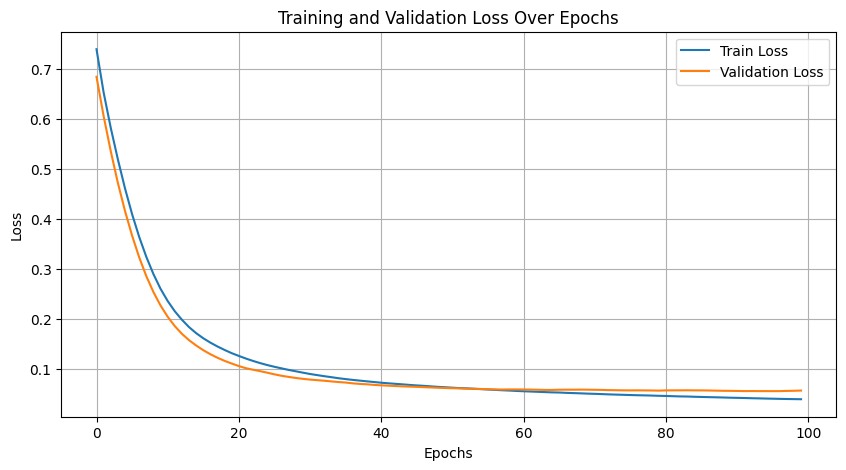

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1).values  # Drop 'id' and 'Unnamed: 32' as they are not features
y = df['diagnosis'].values

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert arrays to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create TensorDatasets for training and validation sets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader for both train and validation sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the neural network with one hidden layer
class CancerNet(nn.Module):
    def __init__(self):
        super(CancerNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize the model, loss function, and optimizer
model = CancerNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(epochs):
    start_time = time.time()
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                predicted = outputs.round()
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(val_dataset)
        val_losses.append(val_loss)
        accuracy = 100 * correct / total

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Acc: {accuracy:.2f}%')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds.')
    return train_losses, val_losses, training_time

# Run training
epochs = 100
train_losses, val_losses, training_time = train_model(epochs)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Assuming the final train_losses, val_losses, and training_time are already available from train_model

# Calculate final training and validation loss
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]

# Calculate final validation accuracy
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in val_loader:
        outputs = model(X_batch)
        predicted = outputs.round()  # Since sigmoid outputs a probability, we round to get the binary classification
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

final_accuracy = 100 * correct / total

# Print the required results
print(f"Total Training Time: {training_time:.2f} seconds")
print(f"Final Training Loss: {final_train_loss:.4f}")
print(f"Final Validation Loss: {final_val_loss:.4f}")
print(f"Validation Accuracy: {final_accuracy:.2f}%")


Total Training Time: 1.66 seconds
Final Training Loss: 0.0388
Final Validation Loss: 0.0561
Validation Accuracy: 98.25%


2B

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/ML Assignment/cancer.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Initial data preview:          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  

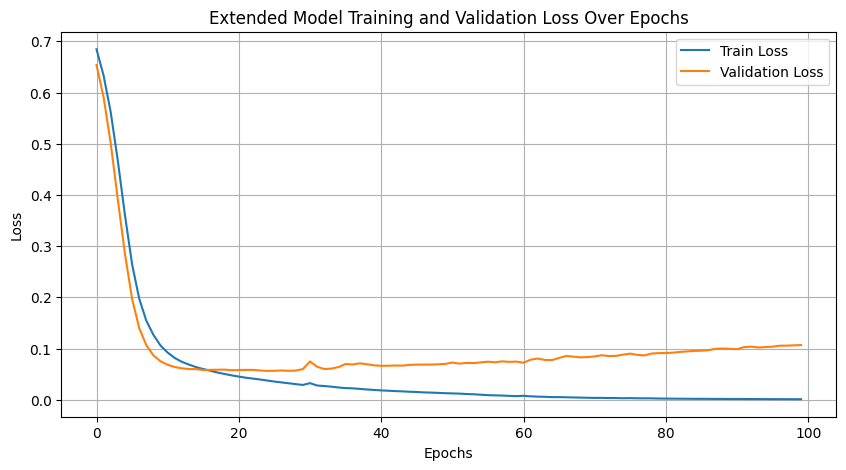

Total Training Time for Extended Model: 2.13 seconds
Final Extended Model Training Loss: 0.0010
Final Extended Model Validation Loss: 0.1068
Validation Accuracy: 98.25%


In [ ]:


# Inspect the initial data
print("Initial data preview:", df.head())
print("Column names:", df.columns.tolist())

# Drop the 'Unnamed: 32' column (contains NaN)
if 'Unnamed: 32' in df.columns:
    df = df.drop(['Unnamed: 32'], axis=1)

# Convert 'diagnosis' to binary labels
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values and confirm data integrity
print("Missing values per column:\n", df.isnull().sum())

# Separate features and target
X = df.drop(['id', 'diagnosis'], axis=1).values  # Drop 'id' and 'diagnosis' columns
y = df['diagnosis'].values

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert arrays to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Create TensorDatasets for training and validation sets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader for both train and validation sets
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Define the extended neural network model with additional hidden layers
class ExtendedCancerNet(nn.Module):
    def __init__(self):
        super(ExtendedCancerNet, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 64)  # Additional hidden layer
        self.fc3 = nn.Linear(64, 16)  # Additional hidden layer
        self.fc4 = nn.Linear(16, 1)   # Output layer
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Initialize the extended model, loss function, and optimizer
model = ExtendedCancerNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function with validation accuracy calculation
def train_model(epochs):
    start_time = time.time()
    train_losses = []
    val_losses = []
    final_accuracy = 0  # Initialize final accuracy

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_dataset)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)
                predicted = outputs.round()
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_loss /= len(val_dataset)
        val_losses.append(val_loss)
        final_accuracy = 100 * correct / total

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Acc: {final_accuracy:.2f}%')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds.')
    return train_losses, val_losses, training_time, final_accuracy

# Run training
epochs = 100
train_losses, val_losses, training_time, final_accuracy = train_model(epochs)

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Extended Model Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final results
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]
print(f"Total Training Time for Extended Model: {training_time:.2f} seconds")
print(f"Final Extended Model Training Loss: {final_train_loss:.4f}")
print(f"Final Extended Model Validation Loss: {final_val_loss:.4f}")
print(f"Validation Accuracy: {final_accuracy:.2f}%")


In [ ]:
3A

100%|██████████| 170M/170M [00:11<00:00, 14.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Epoch [1/100], Loss: 1.6414
Epoch [2/100], Loss: 1.4543
Epoch [3/100], Loss: 1.3615
Epoch [4/100], Loss: 1.2942
Epoch [5/100], Loss: 1.2409
Epoch [6/100], Loss: 1.1811
Epoch [7/100], Loss: 1.1324
Epoch [8/100], Loss: 1.0862
Epoch [9/100], Loss: 1.0417
Epoch [10/100], Loss: 0.9998
Epoch [11/100], Loss: 0.9658
Epoch [12/100], Loss: 0.9185
Epoch [13/100], Loss: 0.8897
Epoch [14/100], Loss: 0.8458
Epoch [15/100], Loss: 0.8127
Epoch [16/100], Loss: 0.7879
Epoch [17/100], Loss: 0.7650
Epoch [18/100], Loss: 0.7365
Epoch [19/100], Loss: 0.7040
Epoch [20/100], Loss: 0.6731
Epoch [21/100], Loss: 0.6493
Epoch [22/100], Loss: 0.6379
Epoch [23/100], Loss: 0.6108
Epoch [24/100], Loss: 0.5895
Epoch [25/100], Loss: 0.5712
Epoch [26/100], Loss: 0.5557
Epoch [27/100], Loss: 0.5353
Epoch [28/100], Loss: 0.5160
Epoch [29/100], Loss: 0.5035
Epoch [30/100], Loss: 0.4798
Epoch [31/100], Loss: 0.4866
Epoch [32/100], Loss:

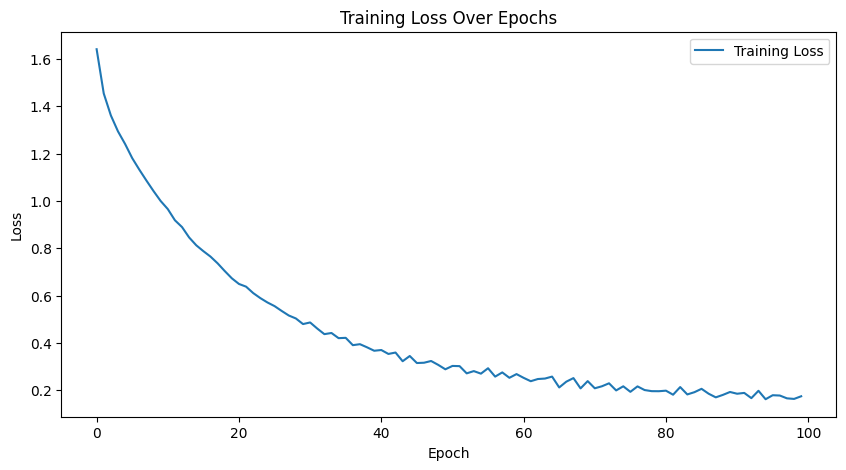

Accuracy on test set: 50.04%
Final Training Loss: 0.1746
Evaluation Accuracy: 50.04%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 data loading and transforming
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Neural network architecture
class CIFAR10Net(nn.Module):
    def __init__(self):
        super(CIFAR10Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(3 * 32 * 32, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Model initialization
model = CIFAR10Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(num_epochs):
    model.train()
    start_time = time.time()
    losses = []
    for epoch in range(num_epochs):
        total_loss = 0
        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(trainloader)
        losses.append(avg_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Total training time: {training_time:.2f} seconds')
    return losses, training_time

# Evaluate the model
def evaluate_model():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Train the network
losses, training_time = train_model(100)

# Plot training losses
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test the network
accuracy = evaluate_model()
print(f'Accuracy on test set: {accuracy:.2f}%')

# Print final outputs required for the assignment
print(f'Final Training Loss: {losses[-1]:.4f}')
print(f'Evaluation Accuracy: {accuracy:.2f}%')


3B

Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Loss: 1.6866
Epoch 2, Loss: 1.4575
Epoch 3, Loss: 1.3402
Epoch 4, Loss: 1.2410
Epoch 5, Loss: 1.1608
Epoch 6, Loss: 1.0834
Epoch 7, Loss: 1.0104
Epoch 8, Loss: 0.9419
Epoch 9, Loss: 0.8703
Epoch 10, Loss: 0.8118
Epoch 11, Loss: 0.7513
Epoch 12, Loss: 0.6983
Epoch 13, Loss: 0.6540
Epoch 14, Loss: 0.6075
Epoch 15, Loss: 0.5680
Epoch 16, Loss: 0.5301
Epoch 17, Loss: 0.4984
Epoch 18, Loss: 0.4598
Epoch 19, Loss: 0.4344
Epoch 20, Loss: 0.4166
Epoch 21, Loss: 0.3884
Epoch 22, Loss: 0.3767
Epoch 23, Loss: 0.3575
Epoch 24, Loss: 0.3424
Epoch 25, Loss: 0.3290
Epoch 26, Loss: 0.3058
Epoch 27, Loss: 0.2956
Epoch 28, Loss: 0.2927
Epoch 29, Loss: 0.2906
Epoch 30, Loss: 0.2638
Epoch 31, Loss: 0.2575
Epoch 32, Loss: 0.2457
Epoch 33, Loss: 0.2502
Epoch 34, Loss: 0.2369
Epoch 35, Loss: 0.2304
Epoch 36, Loss: 0.2207
Epoch 37, Loss: 0.2202
Epoch 38, Loss: 0.2049
Epoch 39, Loss: 0.2089
Epoch 40, Loss: 0.2024
Epoch 41, Los

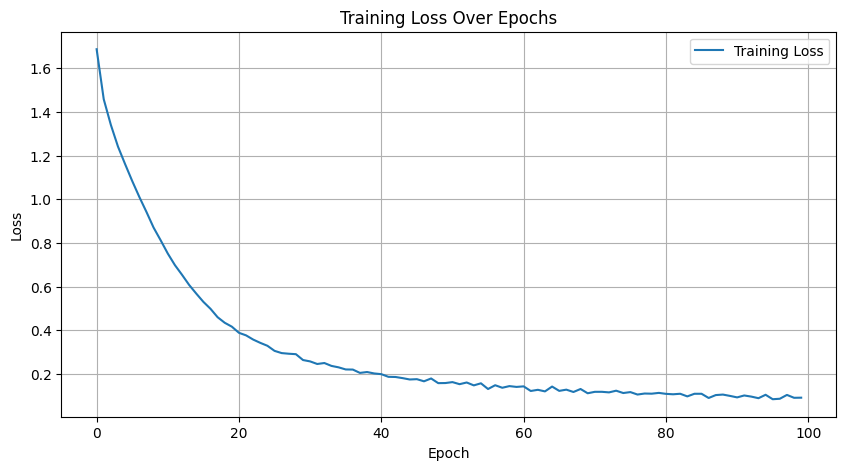

Accuracy on the test set: 53.66%
Final Training Loss: 0.0915
Training Time: 3395.07 seconds
Evaluation Accuracy: 53.66%


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# CIFAR-10 data loading and transforming
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Neural network architecture with additional hidden layers
class ExtendedCIFAR10Net(nn.Module):
    def __init__(self):
        super(ExtendedCIFAR10Net, self).__init__()
        self.fc1 = nn.Linear(3 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)  # Additional hidden layer
        self.fc4 = nn.Linear(128, 64)   # Additional hidden layer
        self.fc5 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

# Model initialization
model = ExtendedCIFAR10Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Function to train the network
def train_model(num_epochs):
    start_time = time.time()
    training_losses = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        training_losses.append(running_loss / len(trainloader))
        print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.4f}')

    end_time = time.time()
    training_time = end_time - start_time
    print(f'Training completed in {training_time:.2f} seconds.')
    return training_losses, training_time

# Train the network
training_losses, training_time = train_model(100)

# Plot training losses
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Function to evaluate the network accuracy
def evaluate_network():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

# Evaluate the network
accuracy = evaluate_network()
print(f'Final Training Loss: {training_losses[-1]:.4f}')
print(f'Training Time: {training_time:.2f} seconds')
print(f'Evaluation Accuracy: {accuracy:.2f}%')
